In [25]:
import pandas as pd
import numpy as np
import pylab as plt

plt.rc('figure', figsize=(10, 8))
fizsize_with_subplots = (15, 15)
bin_size = 10

In [3]:
labeled_data = pd.read_csv('./data/train.csv')

In [4]:
labeled_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


View data type

In [5]:
labeled_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

View some basic information, mainly for the missing data

In [6]:
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Column "Cabin" has too many missing data. Column "Age" has a lot. Column "Embarked" has 2 missing data.

In [7]:
labeled_data.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


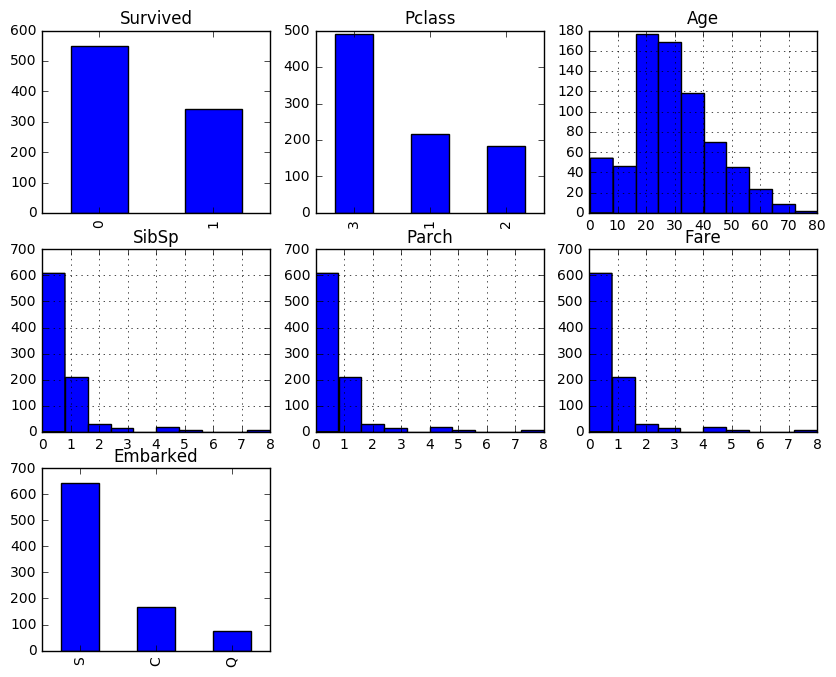

In [26]:
fig = plt.figure(figsize = fizsize_with_subplots)
fig_dims = (3, 3)

plt.close()

# plot servived count
plt.subplot2grid(fig_dims, (0, 0))
labeled_data['Survived'].value_counts().plot(kind = 'bar',
                                            title =  'Survived')

# plot Pclass
plt.subplot2grid(fig_dims, (0, 1))
labeled_data['Pclass'].value_counts().plot(kind = 'bar',
                                            title =  'Pclass')

# plot Age
plt.subplot2grid(fig_dims, (0, 2))
labeled_data['Age'].hist()
plt.title('Age')

# plot SibSp
plt.subplot2grid(fig_dims, (1, 0))
labeled_data['SibSp'].hist()
plt.title('SibSp')

# plot Parch
plt.subplot2grid(fig_dims, (1, 1))
labeled_data['SibSp'].hist()
plt.title('Parch')

# plot Fare
plt.subplot2grid(fig_dims, (1, 2))
labeled_data['SibSp'].hist()
plt.title('Fare')

# plot Embarked
plt.subplot2grid(fig_dims, (2, 0))
labeled_data['Embarked'].value_counts().plot(kind = 'bar',
                                            title =  'Embarked')
plt.show()

## Feature: Pclass
Generate a cross tab of Pclass and Servived

In [27]:
pclass_xt = pd.crosstab(labeled_data['Pclass'], labeled_data['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


打印交叉表

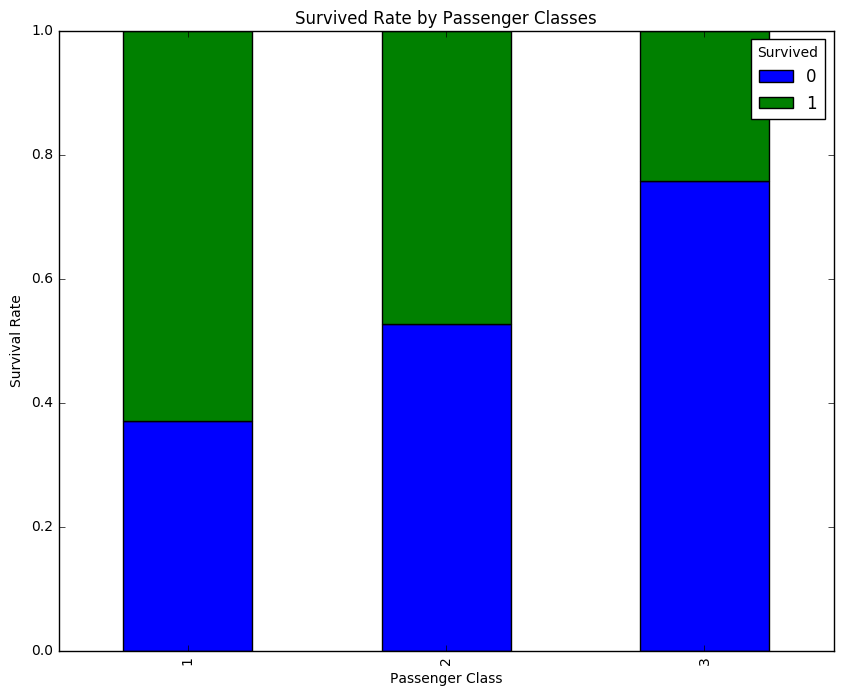

In [30]:
plt.close()
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis = 0)
pclass_xt_pct.plot(kind = 'bar',
                  stacked = True,
                  title = 'Survived Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

头等舱的存活率最高，其次是二等舱，再次是三等舱。

可以看到，生存率与舱位等级成正相关

## 特征： Sex
Sex是字符串型，必须转成int型

In [33]:
sexes = sorted(labeled_data['Sex'].unique())
genders_mapping = dict(zip(sexes, range(len(sexes))))
genders_mapping

{'female': 0, 'male': 1}

女性是0； 男性是1

新建一列，表示int型的Sex

In [36]:
labeled_data['Sex_Val'] = labeled_data['Sex'].map(genders_mapping).astype(int)
labeled_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


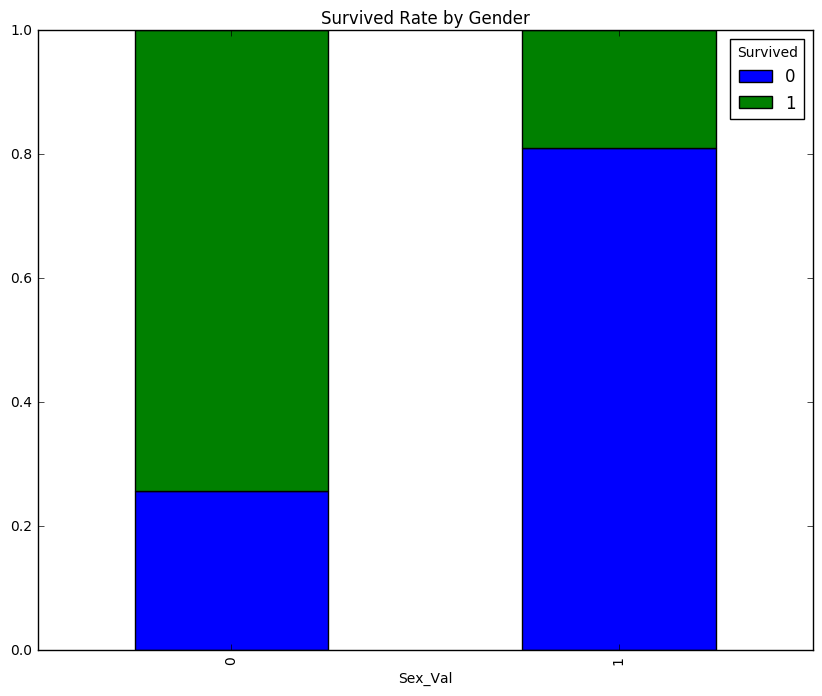

In [37]:
plt.close()
sex_val_xt = pd.crosstab(labeled_data['Sex_Val'], labeled_data['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis = 0)
sex_val_xt_pct.plot(kind = 'bar',
                   stacked = True,
                   title = 'Survived Rate by Gender')
plt.show()

大部分的女性存活，男性存活的少。貌似与性别也有关。

In [6]:
from sklearn.model_selection import train_test_split

In [9]:
data = labeled_data.iloc[:, 1:]
label = labeled_data.iloc[:, :1]

In [15]:
train_data, test_data, train_label, test_label = train_test_split(
      data, 
      label, 
      train_size=0.8,
      random_state=0)

In [16]:
test_data.shape

(179, 11)

In [17]:
train_label.shape

(712, 1)

In [ ]:
index = 